## Project Concrete Strength Prediction

### Importing modules and data frame

In [1]:
import pandas as pd
import warnings
import statistics
warnings.filterwarnings('ignore')
%matplotlib inline
#import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn import tree
from os import system
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
dframe = pd.read_csv("concrete.csv")

In [3]:
dframe.head(10) # verifying the first 10 rows and shape

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29
5,255.00,0.00,0.00,192.00,0.00,889.80,945.00,90,21.86
6,166.80,250.20,0.00,203.50,0.00,975.60,692.60,7,15.75
7,251.40,0.00,118.30,188.50,6.40,"1,028.40",757.70,56,36.64
8,296.00,0.00,0.00,192.00,0.00,"1,085.00",765.00,28,21.65
9,155.00,184.00,143.00,194.00,9.00,880.00,699.00,28,28.99


In [4]:
dframe.shape

(1030, 9)

### Univariate analysis

In [5]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# Chacking numerical columns
dframe.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,"1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00"
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,"1,029.40",824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,"1,145.00",992.60,365.00,82.60


In [7]:
# Verifying invalid data 
inv = dframe.isnull().sum()
print('Checking for invalid data: \n', inv)

Checking for invalid data: 
 cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


In [8]:
# Checking data attributes
dframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


In [9]:
dframe.skew()

cement          0.51
slag            0.80
ash             0.54
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age             3.27
strength        0.42
dtype: float64

We can see some skew on age, so we will plot this variable to verify values

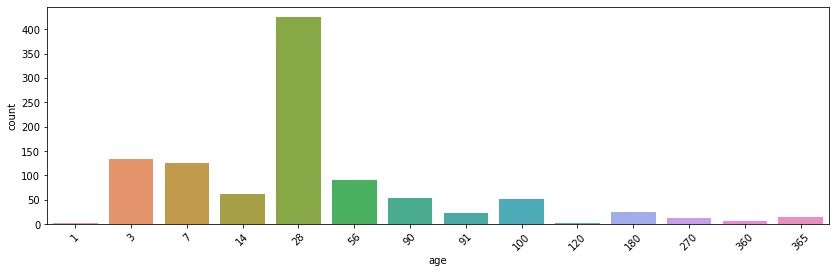

In [10]:
plt.figure(figsize=(14,4))
plt.xticks(rotation=45)
age=sns.countplot(dframe['age'])

We see some outliers at the age of 120 and above, but we do not need to bin the data as the target is not cetegorical

### Bivariate analysis

We check now the correlation of variables:

In [11]:
dframe.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
ash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
superplastic,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
coarseagg,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
fineagg,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


We can see the higher positive correlation with strenght with **cement** and **age**. We will check however other relations between strenght and other variables

<AxesSubplot:xlabel='cement', ylabel='strength'>

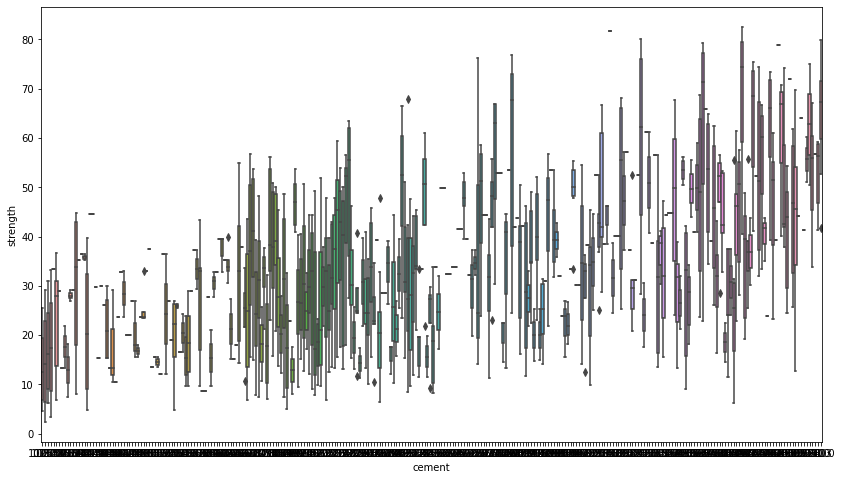

In [12]:
plt.figure(figsize=(14,8))
sns.boxplot(y="strength", x="cement", data=dframe)

We can see a hihgher level of strength as cement increases

<AxesSubplot:xlabel='age', ylabel='strength'>

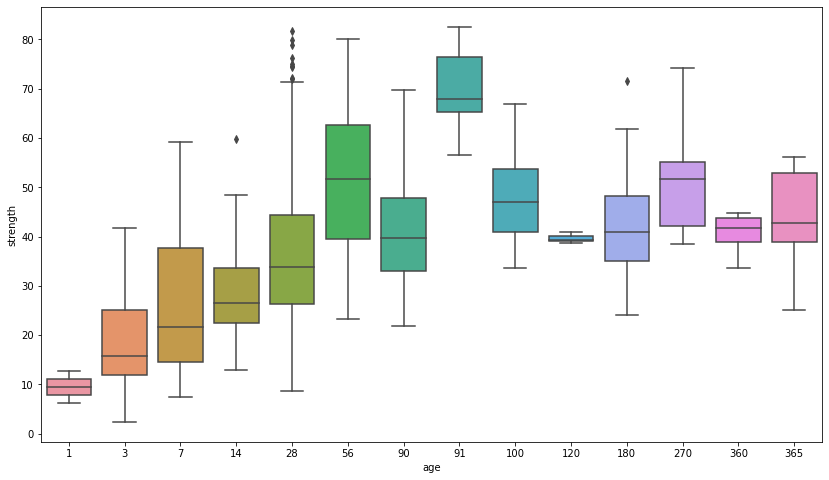

In [13]:
plt.figure(figsize=(14,8))
sns.boxplot(y="strength", x="age", data=dframe)

We can see that as age increases the strength increase, although around the level of 90 the strength begins to decrease

<AxesSubplot:xlabel='slag', ylabel='strength'>

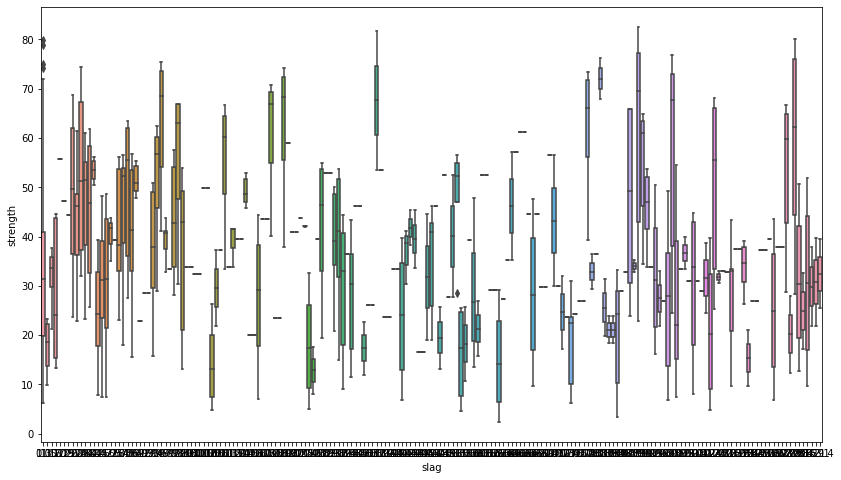

In [14]:
plt.figure(figsize=(14,8))
sns.boxplot(y="strength", x="slag", data=dframe)

We don't see any relation between slag and strength

<AxesSubplot:xlabel='ash', ylabel='strength'>

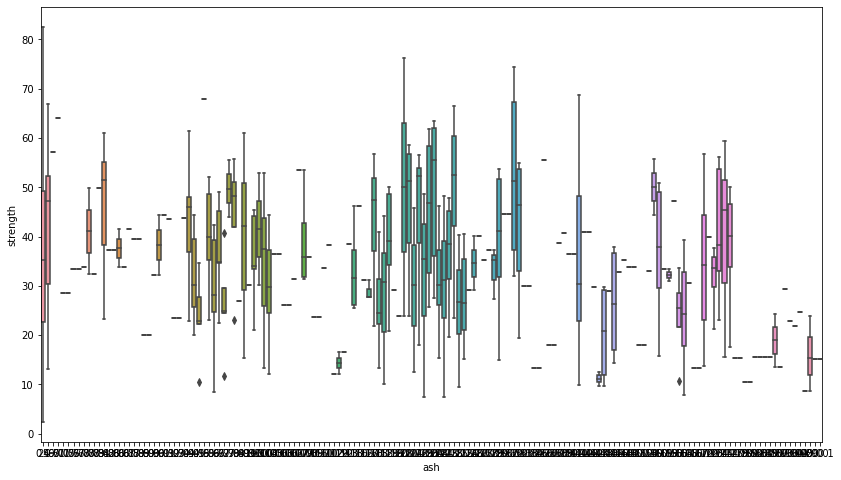

In [15]:
plt.figure(figsize=(14,8))
sns.boxplot(y="strength", x="ash", data=dframe)

<AxesSubplot:xlabel='water', ylabel='strength'>

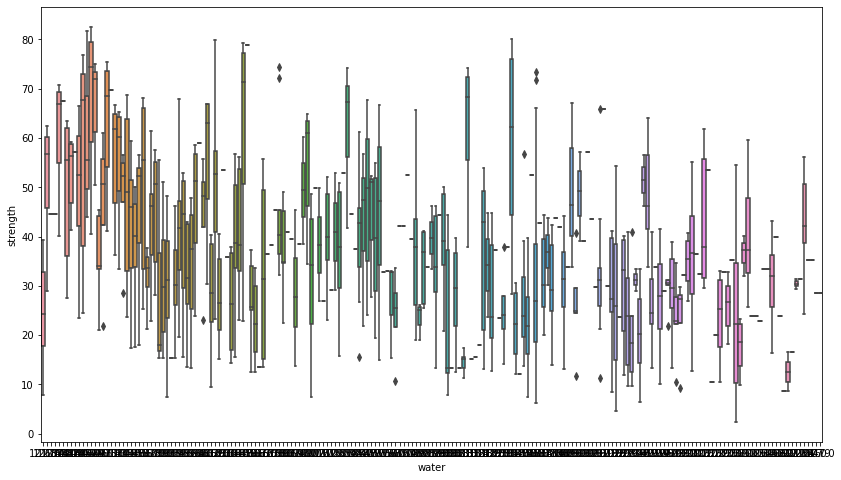

In [16]:
plt.figure(figsize=(14,8))
sns.boxplot(y="strength", x="water", data=dframe)

<AxesSubplot:xlabel='superplastic', ylabel='strength'>

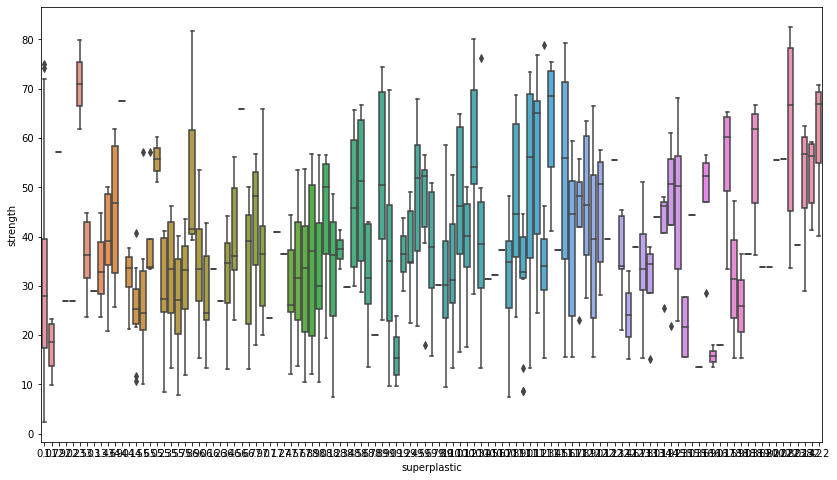

In [17]:
plt.figure(figsize=(14,8))
sns.boxplot(y="strength", x="superplastic", data=dframe)

<AxesSubplot:xlabel='coarseagg', ylabel='strength'>

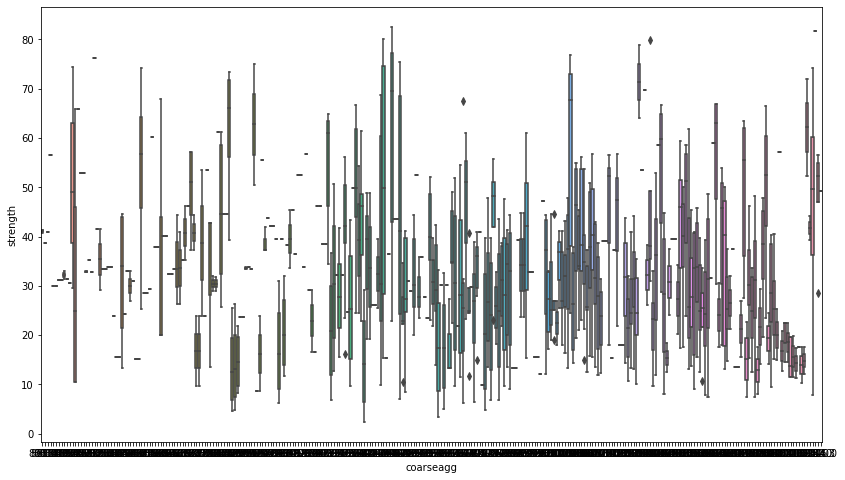

In [18]:
plt.figure(figsize=(14,8))
sns.boxplot(y="strength", x="coarseagg", data=dframe)

<AxesSubplot:xlabel='fineagg', ylabel='strength'>

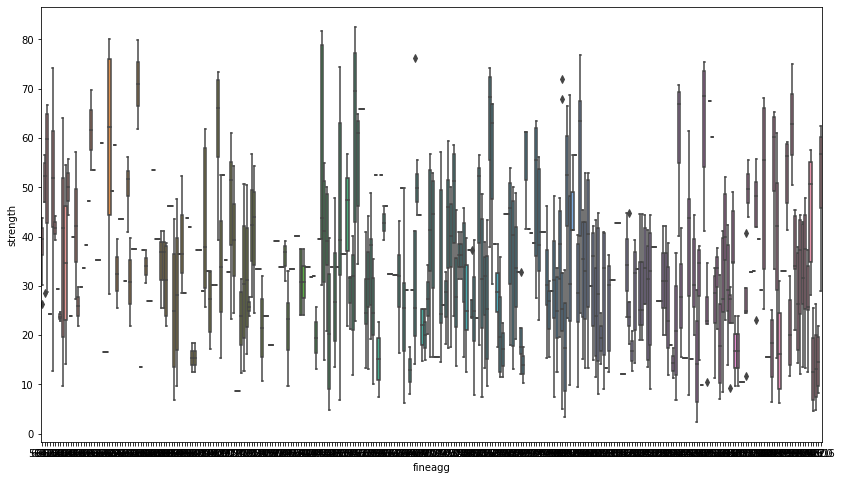

In [19]:
plt.figure(figsize=(14,8))
sns.boxplot(y="strength", x="fineagg", data=dframe)

### For the others variable there is no relations. The strong predictors of strength are *age* and *cement*

### Apply feature selection

In [20]:
from sklearn.preprocessing import PolynomialFeatures 
x = dframe.drop('strength', axis = 1)
y = dframe['strength']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
poly = PolynomialFeatures( degree = 2, include_bias = False) 
xPoly_train = poly.fit_transform(x_train)
xPoly_train[0:2]

array([[3.5000000e+02, 0.0000000e+00, 0.0000000e+00, 2.0300000e+02,
        0.0000000e+00, 9.7400000e+02, 7.7500000e+02, 1.4000000e+01,
        1.2250000e+05, 0.0000000e+00, 0.0000000e+00, 7.1050000e+04,
        0.0000000e+00, 3.4090000e+05, 2.7125000e+05, 4.9000000e+03,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.1209000e+04, 0.0000000e+00, 1.9772200e+05,
        1.5732500e+05, 2.8420000e+03, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.4867600e+05, 7.5485000e+05,
        1.3636000e+04, 6.0062500e+05, 1.0850000e+04, 1.9600000e+02],
       [3.7400000e+02, 1.8920000e+02, 0.0000000e+00, 1.7010000e+02,
        1.0100000e+01, 9.2610000e+02, 7.5670000e+02, 9.1000000e+01,
        1.3987600e+05, 7.0760800e+04, 0.0000000e+00, 6.3617400e+04,
        3.7774000e+03, 3.4636140e+05, 2.8300580

In [21]:
x = dframe.drop('strength', axis = 1)
y = dframe['strength']

In [22]:
# Spliting the data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [23]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (721, 8) (721,)
Testing dataset shape: (309, 8) (309,)


In [24]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [25]:
model = LinearRegression()
linR = LinearRegression()

In [26]:
sfs1 = sfs(linR, k_features=6, forward=True, scoring='r2', cv=8)
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [27]:
sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.27367476, 0.15777621, 0.31292011, 0.27020083, 0.23341615,
         0.21146389, 0.29399919, 0.26471649]),
  'avg_score': 0.2522709522587124,
  'feature_names': ('0',),
  'ci_bound': 0.040535896463987336,
  'std_dev': 0.04650811314057813,
  'std_err': 0.017578414473832127},
 2: {'feature_idx': (0, 4),
  'cv_scores': array([0.40856445, 0.26218778, 0.42661964, 0.33655161, 0.32057394,
         0.31704121, 0.41428325, 0.33218091]),
  'avg_score': 0.3522503465439859,
  'feature_names': ('0', '4'),
  'ci_bound': 0.0472928948377053,
  'std_dev': 0.05426063059470096,
  'std_err': 0.020508590647874497},
 3: {'feature_idx': (0, 4, 7),
  'cv_scores': array([0.54493717, 0.36719947, 0.50714176, 0.47711143, 0.46020999,
         0.40113302, 0.4845845 , 0.49464087]),
  'avg_score': 0.467119774409527,
  'feature_names': ('0', '4', '7'),
  'ci_bound': 0.04694212706576335,
  'std_dev': 0.053858183661325804,
  'std_err': 0.020356480004787177},
 4: {'feature_

In [28]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

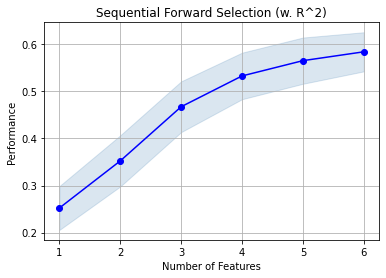

In [29]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [51]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 7]


In [52]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'superplastic', 'age']


### The maximum level achieved is around 60% with six features